In [41]:
import cv2
import numpy as np
import math
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

In [42]:
distThresh=30

## Load images and detect keypoints

In [43]:
img1 = cv2.imread('./data/goodLeft.jpg',0)
img2 = cv2.imread('./data/goodRight.jpg',0)

# Initiate ORB detector
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None) 

img1 = cv2.drawKeypoints(img1, kp1, None)
img2 = cv2.drawKeypoints(img2, kp2, None)

## BruteForce Matching with Norm Hamming

matches:  259


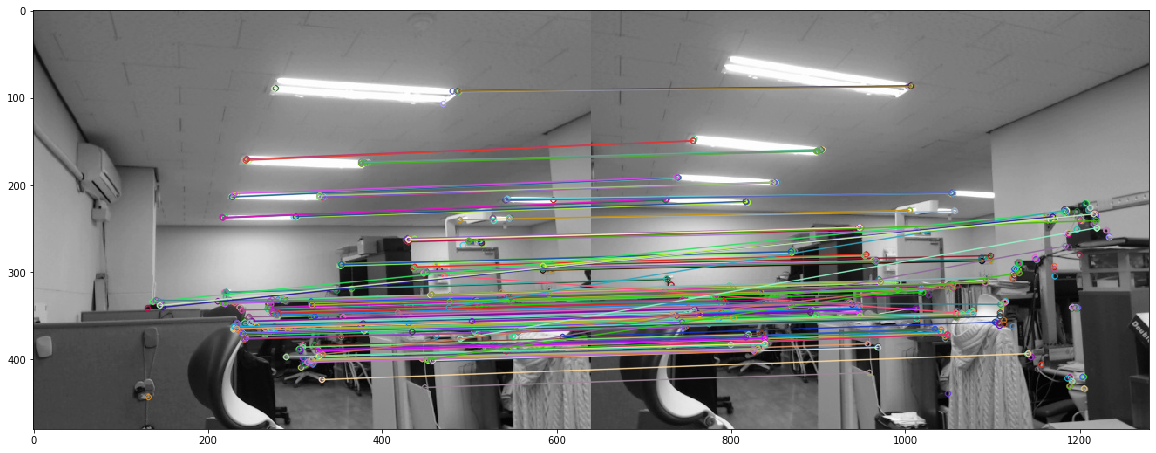

In [44]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:], None, flags=2)
plt.figure(figsize=(20,10))
plt.imshow(img3)
print("matches: ", len(matches))

## Filter some suspicious pairs

pairs:  259
pairs:  231


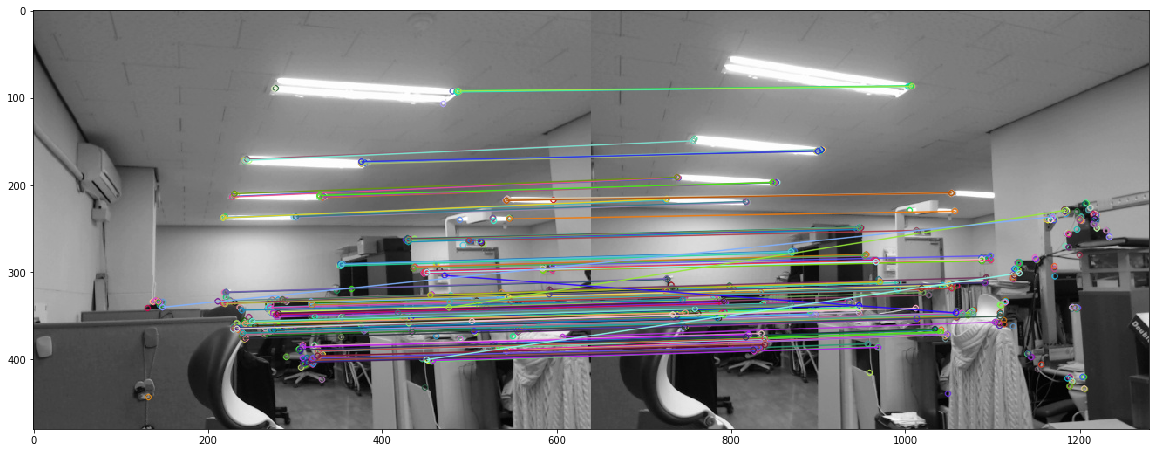

In [45]:
print("pairs: ",len(matches))

for item in matches:
    if item.distance>distThresh:
        matches.remove(item)
        
print("pairs: ",len(matches))

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:], None, flags=2)
plt.figure(figsize=(20,10))
plt.imshow(img3)


## Return pairs

In [46]:
Left=[]
Right=[]
for idx in range(len(matches)):
    Left.append(kp1[matches[idx].queryIdx].pt)
    Right.append(kp2[matches[idx].trainIdx].pt)
    print(Left[idx], Right[idx])

(352.34619140625, 292.62652587890625) (229.92083740234375, 277.69659423828125)
(322.55999755859375, 334.08001708984375) (197.28001403808594, 319.6800231933594)
(217.0, 237.0) (86.0, 217.0)
(430.8000183105469, 261.6000061035156) (308.4000244140625, 248.40000915527344)
(322.8000183105469, 334.8000183105469) (198.0, 320.0)
(430.5600280761719, 262.08001708984375) (308.1600036621094, 249.12001037597656)
(321.40802001953125, 335.2320251464844) (196.9920196533203, 321.40802001953125)
(380.1600341796875, 174.52801513671875) (263.52001953125, 159.8400115966797)
(426.9958190917969, 262.76666259765625) (304.5704345703125, 250.82272338867188)
(323.0, 335.0) (196.8000030517578, 320.4000244140625)
(221.0, 323.0) (87.0, 308.0)
(220.8000030517578, 322.8000183105469) (86.4000015258789, 307.20001220703125)
(273.0240173339844, 345.60003662109375) (143.42401123046875, 331.7760314941406)
(225.0, 333.0) (91.0, 318.0)
(334.0, 213.0) (213.0, 197.0)
(271.20001220703125, 333.6000061035156) (141.60000610351562, 

In [40]:
def MatchedKeyPoint(img1, img2):

    # Initiate ORB detector
    orb = cv2.ORB_create()
    
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None) 

    img1 = cv2.drawKeypoints(img1, kp1, None)
    img2 = cv2.drawKeypoints(img2, kp2, None)

    ## bf matchi g with norm hamming
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x:x.distance)
    
    ## filter some matches with far difference
    for item in matches:
        if item.distance>distThresh:
            matches.remove(item)
            
    ## return pairs
    Left=[]
    Right=[]
    for idx in range(len(matches)):
        Left.append(kp1[matches[idx].queryIdx].pt)
        Right.append(kp2[matches[idx].trainIdx].pt)
        
    return Left, Right